## 1

'Existem ao todo 293 linhas.'

,y
count,293.000000
mean,308971.310580
std,86084.323897
min,146376.000000
25%,234503.000000
50%,314051.000000
75%,375795.000000
max,518253.000000


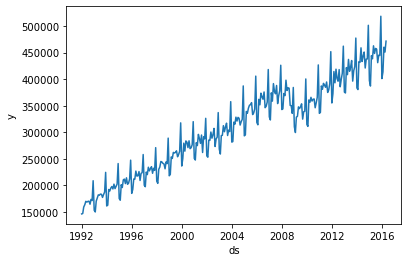

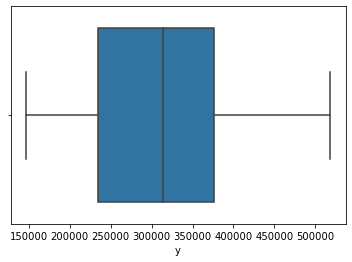

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/master/examples/example_retail_sales.csv', sep=',')
df['ds'] = pd.to_datetime(df['ds'])
display(f'Existem ao todo {len(df)} linhas.')

display(df.describe())
# Analisando o "describe" nota-se que não existem linhas ausentes (o valor em "count" é igual ao total de linhas)

sns.lineplot(data=df, x='ds', y='y')
plt.show()

sns.boxplot(df['y'])
plt.show()

# O boxplot e o lineplot não demonstram outliers por conta de erros de digitação ou algo do gênero
# Por outro lado, o lineplot mostra uma queda em 2008 (ano da crise da bolha imobiliária nos EUA

## 2

Importing plotly failed. Interactive plots will not work.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


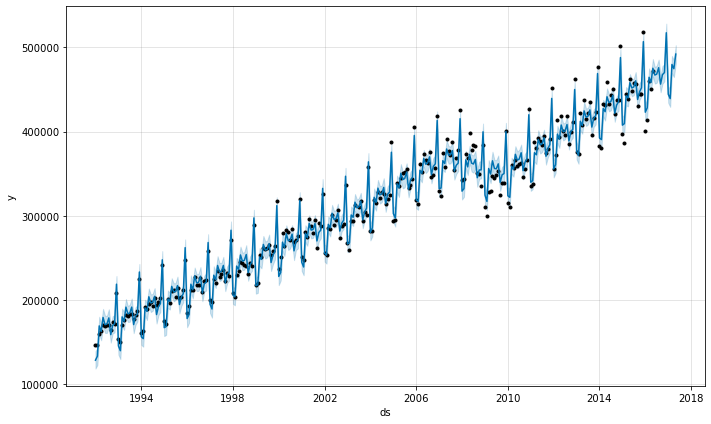

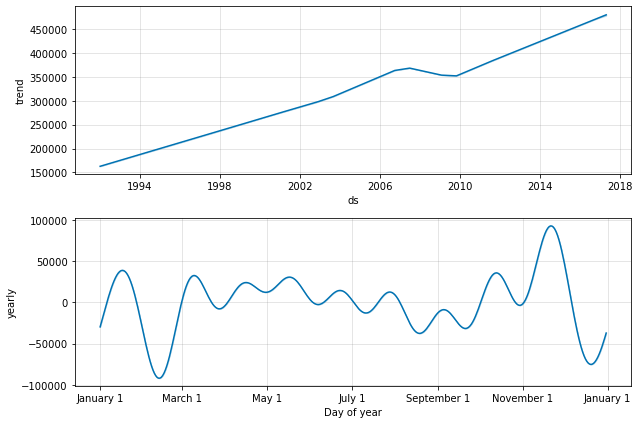

In [2]:
from prophet import Prophet

model = Prophet().fit(df)
future = model.make_future_dataframe(periods=12, freq='MS')
# o MS faz com que geremos o dia 1 de cada mês por 12 meses

forecast = model.predict(future)
fig = model.plot(forecast)
fig_components = model.plot_components(forecast)

## 3

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


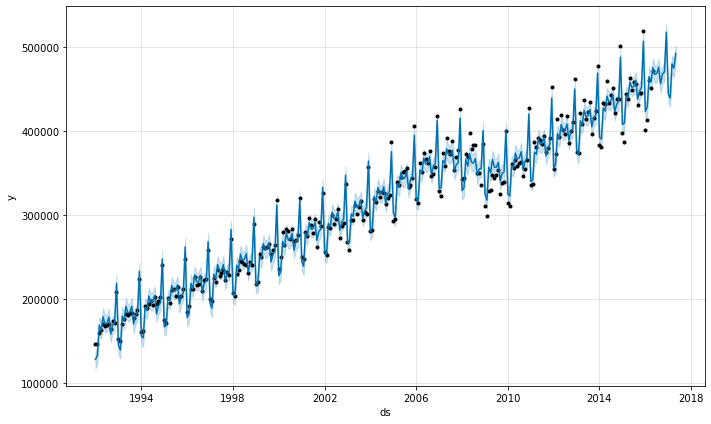

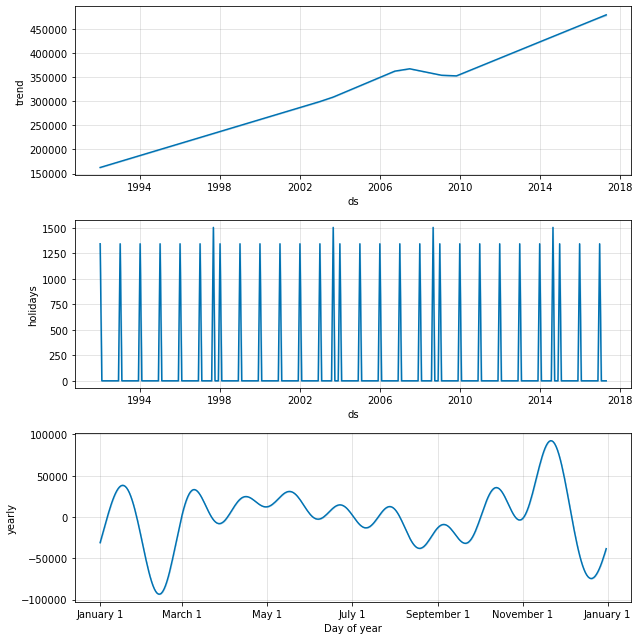

In [3]:
from prophet import Prophet

model = Prophet()
model.add_country_holidays(country_name='US')
# precisamos adicionar os feriados antes de fazermos o fit

model = model.fit(df)

future = model.make_future_dataframe(periods=12, freq='MS')
# o MS faz com que geremos o dia 1 de cada mês por 12 meses

forecast = model.predict(future)
fig = model.plot(forecast)
fig_components = model.plot_components(forecast)

## 4

In [4]:
import pandas as pd
from prophet import Prophet

df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/master/examples/example_retail_sales.csv', sep=',')
df['ds'] = pd.to_datetime(df['ds'])
model = Prophet().fit(df)

forecast = model.predict(model.make_future_dataframe(periods=24, freq='MS'))
forecast

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,162889.401416,117837.451313,138700.640953,162889.401416,162889.401416,-34243.690277,-34243.690277,-34243.690277,-34243.690277,-34243.690277,-34243.690277,0.0,0.0,0.0,128645.711139
1,1992-02-01,163938.761083,123853.637420,142794.852042,163938.761083,163938.761083,-30525.553903,-30525.553903,-30525.553903,-30525.553903,-30525.553903,-30525.553903,0.0,0.0,0.0,133413.207180
2,1992-03-01,164920.420126,159339.941335,179350.330938,164920.420126,164920.420126,4408.034235,4408.034235,4408.034235,4408.034235,4408.034235,4408.034235,0.0,0.0,0.0,169328.454362
3,1992-04-01,165969.779793,152660.722749,173015.050368,165969.779793,165969.779793,-3178.517574,-3178.517574,-3178.517574,-3178.517574,-3178.517574,-3178.517574,0.0,0.0,0.0,162791.262220
4,1992-05-01,166985.289149,169164.994979,188878.823096,166985.289149,166985.289149,12343.688836,12343.688836,12343.688836,12343.688836,12343.688836,12343.688836,0.0,0.0,0.0,179328.977984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2018-01-01,490980.093424,448880.565375,470730.967164,486057.927895,495258.641630,-31242.341235,-31242.341235,-31242.341235,-31242.341235,-31242.341235,-31242.341235,0.0,0.0,0.0,459737.752189
313,2018-02-01,492410.509095,446794.155273,469152.108457,487135.785277,496944.178069,-34457.973825,-34457.973825,-34457.973825,-34457.973825,-34457.973825,-34457.973825,0.0,0.0,0.0,457952.535271
314,2018-03-01,493702.497444,481780.148494,505858.886702,488080.989949,498654.532561,1101.838500,1101.838500,1101.838500,1101.838500,1101.838500,1101.838500,0.0,0.0,0.0,494804.335943
315,2018-04-01,495132.913115,478141.953015,503069.808167,489149.135406,500540.048424,-4109.959485,-4109.959485,-4109.959485,-4109.959485,-4109.959485,-4109.959485,0.0,0.0,0.0,491022.953630
